<a href="https://colab.research.google.com/github/Taeho-Kim-0322/Deep_Learning_Start/blob/master/%EC%8B%A4%EC%8A%B5_2_%ED%95%99%EC%8A%B5%EA%B0%9C%EC%84%A0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activation / Loss / Optimizer

In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential

# 기존 신경망 아키텍처에 조건 바꿔 적용해보기

[tf.keras.activations docs](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

[tf.keras.losses docs](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[tf.keras.optimizer docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [ ]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 0~255의 픽셀 값을 0~1로 조정
x_train, x_test = x_train / 255.0, x_test / 255.0

# shape 조정
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정답 label을 길이10 벡터화
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

11493376/11490434 [==============================] - 0s 0us/step


모델 구현하기

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 커스터마이징을 위해선 기존 방식 이용, 기본 기능 활용하려면 string으로 이름을 입력

# 커스터마이징
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.0) 
# mse_loss = tf.keras.losses.MeanSquaredError()
# model.compile(optimizer=sgd_optimizer, loss=mse_loss, metrics=['accuracy'])  

# 기본 기능 활용
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 5s - loss: 0.0908 - accuracy: 0.1310 - val_loss: 0.0901 - val_accuracy: 0.1710
Epoch 2/10
1563/1563 - 4s - loss: 0.0897 - accuracy: 0.1927 - val_loss: 0.0891 - val_accuracy: 0.2424
Epoch 3/10
1563/1563 - 4s - loss: 0.0886 - accuracy: 0.2668 - val_loss: 0.0880 - val_accuracy: 0.3084
Epoch 4/10
1563/1563 - 4s - loss: 0.0876 - accuracy: 0.3169 - val_loss: 0.0869 - val_accuracy: 0.3474
Epoch 5/10
1563/1563 - 4s - loss: 0.0865 - accuracy: 0.3502 - val_loss: 0.0859 - val_accuracy: 0.3663
Epoch 6/10
1563/1563 - 4s - loss: 0.0854 - accuracy: 0.3610 - val_loss: 0.0847 - val_accuracy: 0.3786
Epoch 7/10
1563/1563 - 4s - loss: 0.0843 - accuracy: 0.3730 - val_loss: 0.0835 - val_accuracy: 0.3866
Epoch 8/10
1563/1563 - 4s - loss: 0.0831 - accuracy: 0.3809 - val_loss: 0.0823 - val_accuracy: 0.3990
Epoch 9/10
1563/1563 - 4s - loss: 0.0818 - accuracy: 0.3932 - val_loss: 0.0809 - val_accuracy: 0.4177
Epoch 10/10
1563/1563 - 4s - loss: 0.0805 - accuracy: 0.4150 - val_loss: 0.0796 - 

# 실습 MISSION
위에서 작성했던 코드를 조건에 맞게 변경해보자!

* activation을 relu로 변경
* loss를 cross-entropy로 변경 ('categorical_crossentropy', 상기 링크 참고)
* optimizer를 adam으로 변경

In [ ]:
# MISSION을 작성하세요

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 기본 기능 활용
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 6s - loss: 0.3526 - accuracy: 0.9008 - val_loss: 0.1922 - val_accuracy: 0.9466
Epoch 2/10
1563/1563 - 5s - loss: 0.1777 - accuracy: 0.9478 - val_loss: 0.1484 - val_accuracy: 0.9586
Epoch 3/10
1563/1563 - 5s - loss: 0.1324 - accuracy: 0.9611 - val_loss: 0.1342 - val_accuracy: 0.9615
Epoch 4/10
1563/1563 - 5s - loss: 0.1065 - accuracy: 0.9684 - val_loss: 0.1146 - val_accuracy: 0.9658
Epoch 5/10
1563/1563 - 5s - loss: 0.0873 - accuracy: 0.9745 - val_loss: 0.1065 - val_accuracy: 0.9698
Epoch 6/10
1563/1563 - 5s - loss: 0.0748 - accuracy: 0.9777 - val_loss: 0.1029 - val_accuracy: 0.9708
Epoch 7/10
1563/1563 - 5s - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 8/10
1563/1563 - 5s - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.1021 - val_accuracy: 0.9717
Epoch 9/10
1563/1563 - 5s - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.1000 - val_accuracy: 0.9722
Epoch 10/10
1563/1563 - 5s - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0981 - 

# 실습 MISSION
다양한 optimizer를 테스트하고 수렴 속도를 확인하자

위 MISSION에서 작성한 모델을 활용, 
두 개의 서로다른 모델(model_sgd, model_sgdm)을 만들어 아래 두 optimizer를 각각 적용하고 빌드하여 history를 다른이름으로 저장(history_sgd, history_sgdm)한 뒤 그래프로 나타내시오

* SGD (기본설정)
* SGD with learning rate 0.1, momentum 0.1

(힌트, learning rate를 수정해보았던 것처럼 momentum 값도 커스터마이징할 수 있습니다!)

In [ ]:
# MISSION을 작성하세요
# Model_sgd
model_sgd = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_sgd.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print('--------------------------Model_sgd--------------------------')
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_sgd = model_sgd.evaluate(x_test,  y_test, verbose=2)
print(result_sgd)

# Model_sgdm
model_sgdm = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


sgdm_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)

model_sgdm.compile(optimizer=sgdm_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
print('--------------------------Model_sgdm--------------------------')
history_sgdm = model_sgdm.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_sgdm = model_sgdm.evaluate(x_test,  y_test, verbose=2)
print(result_sgdm)

--------------------------Model_sgd--------------------------
Epoch 1/10
1563/1563 - 5s - loss: 0.7530 - accuracy: 0.8090 - val_loss: 0.3758 - val_accuracy: 0.9039
Epoch 2/10
1563/1563 - 5s - loss: 0.3652 - accuracy: 0.8994 - val_loss: 0.3069 - val_accuracy: 0.9174
Epoch 3/10
1563/1563 - 5s - loss: 0.3124 - accuracy: 0.9134 - val_loss: 0.2749 - val_accuracy: 0.9236
Epoch 4/10
1563/1563 - 5s - loss: 0.2820 - accuracy: 0.9206 - val_loss: 0.2536 - val_accuracy: 0.9296
Epoch 5/10
1563/1563 - 5s - loss: 0.2606 - accuracy: 0.9258 - val_loss: 0.2390 - val_accuracy: 0.9332
Epoch 6/10
1563/1563 - 5s - loss: 0.2437 - accuracy: 0.9313 - val_loss: 0.2265 - val_accuracy: 0.9361
Epoch 7/10
1563/1563 - 5s - loss: 0.2296 - accuracy: 0.9356 - val_loss: 0.2164 - val_accuracy: 0.9412
Epoch 8/10
1563/1563 - 5s - loss: 0.2176 - accuracy: 0.9393 - val_loss: 0.2057 - val_accuracy: 0.9435
Epoch 9/10
1563/1563 - 5s - loss: 0.2066 - accuracy: 0.9421 - val_loss: 0.1974 - val_accuracy: 0.9462
Epoch 10/10
1563/156

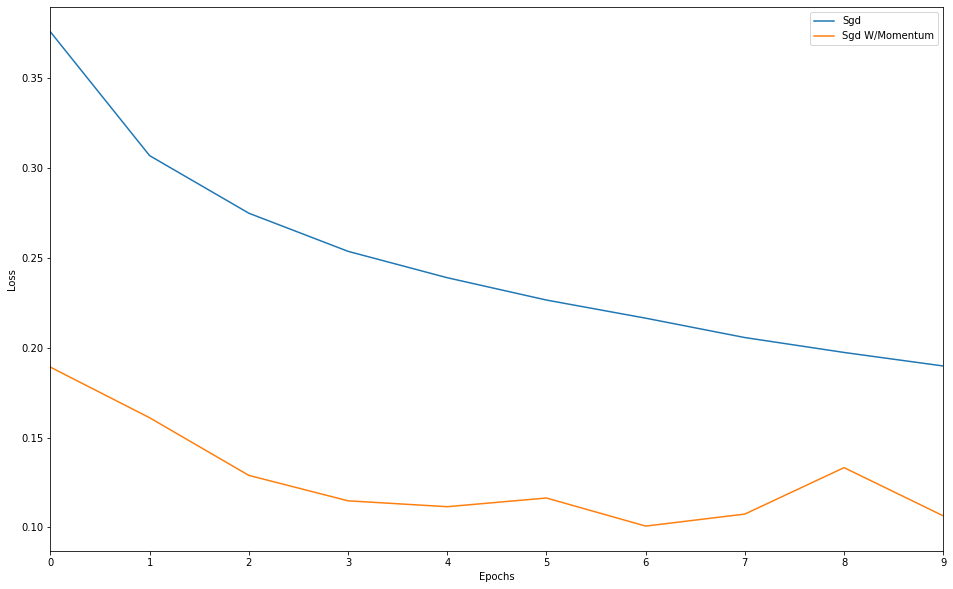

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    plt.plot(history.epoch, history.history['val_loss'], label=name.title()) 

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  
plot_history([('SGD', history_sgd),
              ('SGD w/momentum', history_sgdm)])